In [1]:
#from wam2layers.analysis import load_output
import xarray as xr
from pathlib import Path

import matplotlib.pyplot as plt
from cartopy import crs, feature as cfeature
from cmocean import cm

In [2]:
def load_output(data_path):
    return xr.open_dataset(data_path)


def load_outputs(output_path):
    output_files = Path(output_path).glob("*.nc")
    return xr.open_mfdataset(output_files, concat_dim="time",
                                combine="nested").load()


def plot_output(dataset, type="backtrack"):
    _plotting(dataset, type)


def plot_cumulative(dataset, type="backtrack"):
    _plotting(dataset.sum(dim="time"), type)


def load_plot_output(data_path):
    data_path = Path(data_path)
    type = data_path.name.split("_")[0]
    _plotting(load_output(data_path), type)


def load_plot_cumulative(output_path):
    output_files = Path(output_path).glob("*.nc")
    files = [f for f in output_files]
    type = files[0].name.split("_")[0]
    _plotting(load_outputs(output_path).sum(dim="time"), type)    


def _plotting(dataset, type="backtrack"):
    ax = plt.subplot(projection=crs.PlateCarree())
    if type == "backtrack":
        dataset.e_track.plot(ax = ax, cmap = cm.rain,
                            cbar_kwargs=dict(fraction=0.05, shrink=0.5))
    elif type == "forwardtrack":
        pass
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linestyle="-", linewidth=0.2)


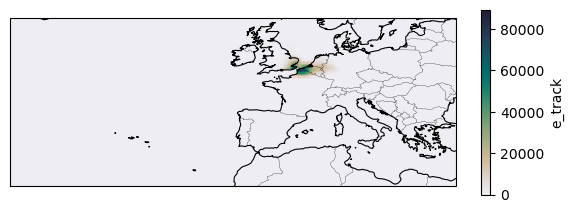

In [8]:
output = load_output("/home/yangliu/WAM2layers/output_data/backtrack_2021-07-01T00-00.nc")
plot_output(output)

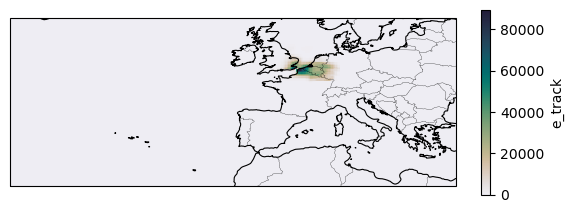

In [9]:
cumulative_outputs = load_outputs("/home/yangliu/WAM2layers/output_data/")
plot_cumulative(cumulative_outputs)